In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# ! pip install 'mordred[full]'

In [0]:
import sys
import pandas as pd

In [0]:
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    project_path = "/content/drive/My Drive/ML_data/pharma_challenge_1/data/"
else:
    project_path = ""

In [4]:
! ls "/content/drive/My Drive/ML_data/pharma_challenge_1/data/"

compound_set1.fps    compound_set2.sdf	  compound_set3.sdf.inchikey
compound_set1.sdf    compound_set2.smi	  compound_set3.smi
compound_set1.smi    compound_set_2.xlsx  compound_set_3.xlsx
compound_set_1.xlsx  compound_set2.xlsx   descriptors.csv
compound_set1.xlsx   compound_set3.sdf	  README


In [0]:
big_df = pd.DataFrame()
for compound_file in ['compound_set_1.xlsx','compound_set_2.xlsx','compound_set_2.xlsx']:
    # read data freom xlsx
    df2 = pd.read_excel(project_path + compound_file)
    df = df2.iloc[:, 0].str.split(';', expand=True)
    df.columns = [n.replace('"', '') for n in df2.columns.str.split(';')[0]]
    # drop index column
    df.drop(columns=[""], inplace=True)

    # user friendly column names
    df.rename(columns=lambda x: x.lstrip("descriptor_value_"), inplace=True)

    # change data type of each column (except smile) to float64
    cols = list(df.columns)
    cols.remove('molecule_smile')
    df[cols] = df[cols].apply(pd.to_numeric)
    big_df = big_df.append(df, ignore_index=True)

In [6]:
big_df.head()

,molecule_smile,BertzCT,ExactMolWt,HeavyAtomCount,HeavyAtomMolWt,MolLogP,MolMR,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,RingCount,Asphericity,Eccentricity,InertialShapeFactor,SpherocityIndex,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,...,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,COc1ccccc1N(CCCC(=O)N1CC(O)(C2CC2)C1)S(C)(=O)=O,769.541061,382.156243,26,356.274,1.22470,98.6716,1,7,1,1,2,1,0,1,5,1,8,0,8,1,1,2,144,3,0.596775,0.987115,0.002166,0.0,0,1,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,Cc1ccc(S(=O)(=O)N(CC(=O)N2CC(O)(C3CC3)C2)c2cc(...,1074.816423,448.122356,30,423.772,3.13544,116.1536,1,6,1,1,2,2,0,2,4,1,8,0,6,1,1,2,160,4,0.324140,0.939410,0.000733,0.0,0,1,0,0,0,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,CCc1nc(-c2ncccn2)sc1C(=O)N1CC(O)(C2CC2)C1,735.793440,330.115047,23,312.269,1.75940,86.0953,1,6,1,1,2,0,2,2,6,1,7,0,4,1,1,2,120,4,0.329071,0.941271,0.001348,0.0,0,1,0,0,0,3,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,COc1ccc(F)cc1-c1ccc(C(=O)N2CC(O)(C3CC3)C2)c(F)c1,873.355170,359.133300,26,340.220,3.23730,91.9233,1,4,1,1,2,2,0,2,3,1,6,0,4,1,1,2,136,4,0.558028,0.983745,0.002125,0.0,0,1,0,0,0,0,0,0,0,0,1,...,0,2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,CCCOC(=O)c1ccc(OCC(=O)N2CC(O)(C3CC3)C2)cc1,602.340064,333.157623,24,310.200,1.61550,86.7643,1,6,1,1,2,1,0,1,5,1,6,0,7,1,1,2,130,3,0.644810,0.990539,0.002330,0.0,0,1,0,0,0,0,0,0,0,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
big_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3373 entries, 0 to 3372
Columns: 112 entries, BertzCT to molecule_smile
dtypes: float64(111), object(1)
memory usage: 2.9+ MB


In [9]:
big_df.describe()

,BertzCT,ExactMolWt,HeavyAtomCount,HeavyAtomMolWt,MolLogP,MolMR,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,RingCount,Asphericity,Eccentricity,InertialShapeFactor,SpherocityIndex,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,...,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,...,3373.000000,3373.000000,3373.0,3373.000000,3373.000000,3373.000000,3373.0,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.0,3373.0,3373.0,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.0,3373.0,3373.000000,3373.000000,3373.000000,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000
mean,0.439725,0.348218,0.402451,0.375012,0.593109,0.431526,0.216647,0.404661,0.056211,0.133709,0.135982,0.371850,0.200415,0.414913,0.360708,0.298784,0.475223,0.0,0.286283,0.052401,0.103691,0.124874,0.363900,0.472195,0.478399,0.825929,0.132376,0.0,0.080640,0.054156,0.040320,0.069374,0.068485,0.170175,0.047732,0.037553,0.149125,0.149125,0.210693,0.185839,...,0.003558,0.164838,0.0,0.002075,0.031723,0.018085,0.0,0.0,0.040024,0.001186,0.007115,0.080270,0.017937,0.034391,0.0,0.0,0.0,0.0,0.007115,0.002965,0.050993,0.041061,0.040617,0.0,0.0,0.045558,0.024459,0.006226,0.0,0.095464,0.024904,0.175511,0.018678,0.002965,0.005929,0.022680,0.000445,0.034984,0.011562,0.005929
std,0.184235,0.169566,0.166264,0.176471,0.134121,0.158935,0.155821,0.153355,0.129400,0.180571,0.155589,0.211821,0.182541,0.177321,0.146898,0.201805,0.155428,0.0,0.120839,0.137418,0.165443,0.168134,0.145880,0.154958,0.257435,0.196352,0.110121,0.0,0.272322,0.134005,0.117452,0.184887,0.252614,0.184453,0.124690,0.117247,0.356265,0.356265,0.158811,0.155131,...,0.059549,0.203287,0.0,0.045515,0.123109,0.133278,0.0,0.0,0.105592,0.034421,0.084064,0.155422,0.093794,0.104293,0.0,0.0,0.0,0.0,0.084064,0.054377,0.121745,0.149696,0.149073,0.0,0.0,0.125763,0.109907,0.058066,0.0,0.169251,0.111482,0.380460,0.135404,0.054377,0.076786,0.104772,0.019248,0.129869,0.074564,0.076786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.2

#### Normalize Data

In [0]:
from sklearn import preprocessing

target = big_df['molecule_smile']
X = big_df[cols].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
X_scaled = min_max_scaler.fit_transform(X)
big_df = pd.DataFrame(X_scaled, columns=cols)
big_df['molecule_smile'] = target

In [13]:
big_df.describe()

,BertzCT,ExactMolWt,HeavyAtomCount,HeavyAtomMolWt,MolLogP,MolMR,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRadicalElectrons,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,NumValenceElectrons,RingCount,Asphericity,Eccentricity,InertialShapeFactor,SpherocityIndex,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,...,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,...,3373.000000,3373.000000,3373.0,3373.000000,3373.000000,3373.000000,3373.0,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.0,3373.0,3373.0,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.0,3373.0,3373.000000,3373.000000,3373.000000,3373.0,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000,3373.000000
mean,0.439725,0.348218,0.402451,0.375012,0.593109,0.431526,0.216647,0.404661,0.056211,0.133709,0.135982,0.371850,0.200415,0.414913,0.360708,0.298784,0.475223,0.0,0.286283,0.052401,0.103691,0.124874,0.363900,0.472195,0.478399,0.825929,0.132376,0.0,0.080640,0.054156,0.040320,0.069374,0.068485,0.170175,0.047732,0.037553,0.149125,0.149125,0.210693,0.185839,...,0.003558,0.164838,0.0,0.002075,0.031723,0.018085,0.0,0.0,0.040024,0.001186,0.007115,0.080270,0.017937,0.034391,0.0,0.0,0.0,0.0,0.007115,0.002965,0.050993,0.041061,0.040617,0.0,0.0,0.045558,0.024459,0.006226,0.0,0.095464,0.024904,0.175511,0.018678,0.002965,0.005929,0.022680,0.000445,0.034984,0.011562,0.005929
std,0.184235,0.169566,0.166264,0.176471,0.134121,0.158935,0.155821,0.153355,0.129400,0.180571,0.155589,0.211821,0.182541,0.177321,0.146898,0.201805,0.155428,0.0,0.120839,0.137418,0.165443,0.168134,0.145880,0.154958,0.257435,0.196352,0.110121,0.0,0.272322,0.134005,0.117452,0.184887,0.252614,0.184453,0.124690,0.117247,0.356265,0.356265,0.158811,0.155131,...,0.059549,0.203287,0.0,0.045515,0.123109,0.133278,0.0,0.0,0.105592,0.034421,0.084064,0.155422,0.093794,0.104293,0.0,0.0,0.0,0.0,0.084064,0.054377,0.121745,0.149696,0.149073,0.0,0.0,0.125763,0.109907,0.058066,0.0,0.169251,0.111482,0.380460,0.135404,0.054377,0.076786,0.104772,0.019248,0.129869,0.074564,0.076786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.2

#### Drop all columns which has zero/low variance

In [14]:
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()
selector.fit(df[cols])
# Feature selector that removes all low-variance features.
features = selector.transform(df[cols])

mask = selector.get_support()
selected_cols = [x for i,x in enumerate(cols) if mask[i]]

print("Selected features count: ",len(selected_cols))

Selected features count:  90


In [0]:
# Seaborn visualization library
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

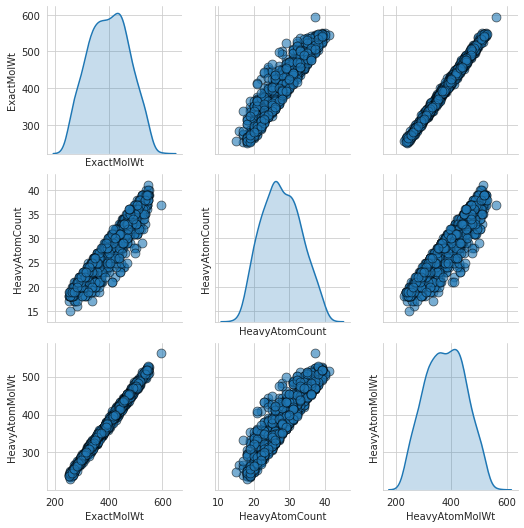

In [19]:
# T0DO: find list of highest correlated columns

sns.set_style("whitegrid")
g = sns.pairplot(df[selected_cols[1:4]], 
             diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'} 
             );
# g = g.map(plt.scatter)

xlabels,ylabels = [],[]

for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)

for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

plt.show()

In [0]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import LabelEncoder

In [0]:
clf = RandomForestClassifier(n_estimators=10, random_state=0, n_jobs=-1)

In [426]:
clf.fit(big_df[selected_cols], big_df['molecule_smile'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [427]:
clf.score(big_df[selected_cols], big_df['molecule_smile'])

0.997924696116217

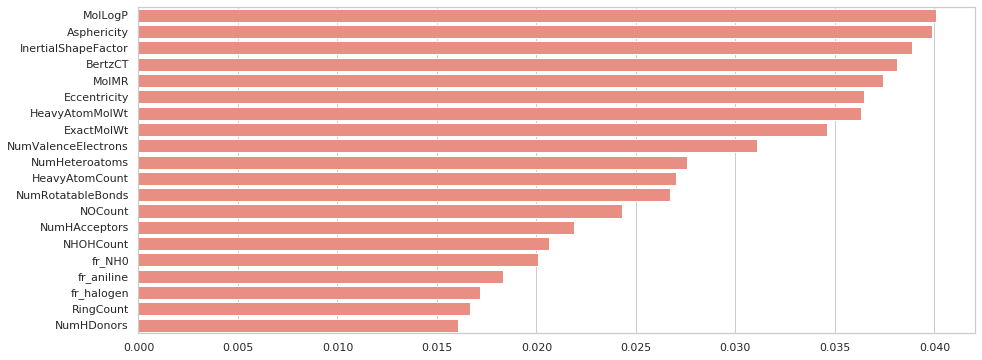

In [502]:
import numpy as np

selected_cols = np.asarray(selected_cols)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1][0:20]
num_selected_features = len(indices)

# Plot the feature importances of the forest
sns.set(style="whitegrid")
a4_dims = (15, 6)
fig, ax = plt.subplots(figsize=a4_dims)
boxplot = sns.barplot(ax=ax, x=importances[indices][0:20], y=selected_cols[indices], color="salmon")

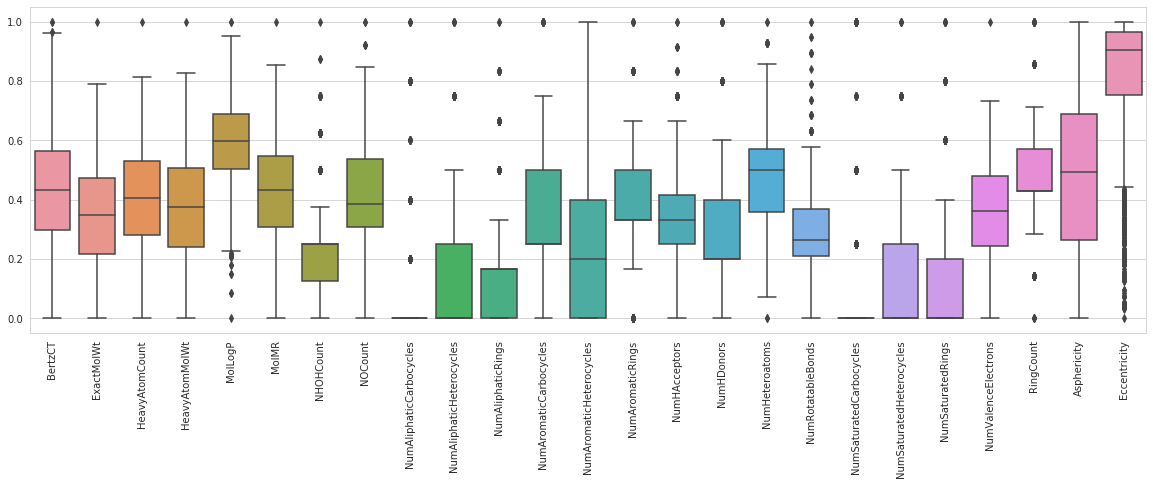

In [465]:
a4_dims = (20, 6)
fig, ax = plt.subplots(figsize=a4_dims)
boxplot = sns.boxplot(ax=ax, data=big_df[selected_cols[0:25]])
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90);

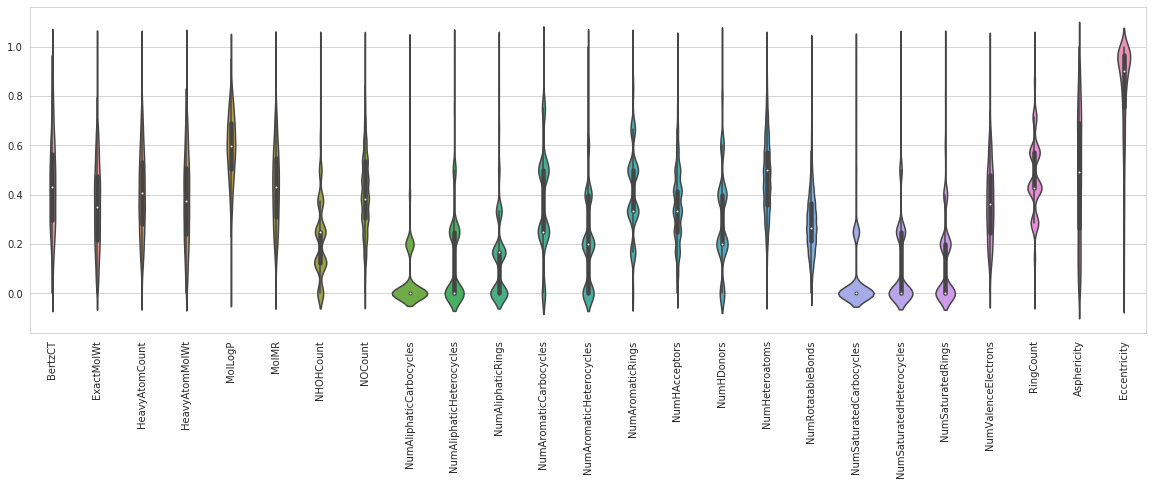

In [466]:
a4_dims = (20, 6)
fig, ax = plt.subplots(figsize=a4_dims)
boxplot = sns.violinplot(ax=ax, data=big_df[selected_cols[0:25]] )
boxplot.set_xticklabels(boxplot.get_xticklabels(), rotation=90);

In [0]:
big_df[list(selected_cols) + ['molecule_smile']].to_csv("descriptors.csv", index=False)